# WeatherPy
----

### Analysis

* Unsurprisingly, max temperatures increase as location moves towards the equator (0 latitude). Cities in the southern hemisphere (negative latitude) show higher max temperatures at this time of year than those in the northern hemisphere due to the Earth's tilt, making it winter in the northern hemisphere and summer in the southern hemisphere at this date.

* There is no strong relationship between latitude and cloudiness. I found it interesting to note obvious banding of cities at 0%, 20%, and ~80% cloudiness. Other, less obvious bands seem apparent as well, suggesting there may be some "human" factor or other less scientifically accurate measure of recording cloudiness data.

* There is no strong relationship between latitude and wind speed. Most cities tend to be located in areas with wind speeds under 10 mph. One remarkable outlier reports wind speeds in excess of 35 mph.

* There is no strong relationship between latitude and humidity. This data might have revealed more insights if we tracking data with more dynamic variation, such as movements of air masses, rather than just simple north/south (latitude) measures.

* The data also reflects the distribution of available land mass (though indirectly) by showing more cities located above 60 degrees latitude (northern hemisphere) and no cities (in this sample) below -60 degrees latitude. This is unsurprising given that there is little landmass other than Antartica below -60 degrees.

---

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime

# Import API key
from api_keys import api_key     # key will be deactivated upon completion

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# build data frame for api info
columns_titles = ["City", "Country", "Temperature (F)", 
                  "Latitude", "Longitude", "Humidity (%)", 
                  "Cloudiness (%)", "Windspeed (mph)"
                 ]
owm_cities_df = pd.DataFrame(columns=columns_titles)

# OpenWeatherMap api url and def units and query
owm_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{owm_url}appid={api_key}&units={units}&q="

# Loop through cities list and call api to add data to df
row_cnt = 1     # row counter used to progress to next row in df

print("Start:  Data Retrieval")
for city in cities:
    target_url = query_url + city
    response = requests.get(target_url).json()
    if response["cod"] == "404":
        print("City not found, skipping...")     # error code and skip
        
    else:
        owm_cities_df.at[row_cnt, "City"] = response["name"]
        owm_cities_df.at[row_cnt, "Country"] = response["sys"]["country"]
        owm_cities_df.at[row_cnt, "Temperature (F)"] = response["main"]["temp_max"]
        owm_cities_df.at[row_cnt, "Latitude"] = response["coord"]["lat"]
        owm_cities_df.at[row_cnt, "Longitude"] = response["coord"]["lon"]
        owm_cities_df.at[row_cnt, "Humidity (%)"] = response["main"]["humidity"]
        owm_cities_df.at[row_cnt, "Cloudiness (%)"] = response["clouds"]["all"]
        owm_cities_df.at[row_cnt, "Windspeed (mph)"] = response["wind"]["speed"]
#             print linebreak and row counter, city, country
        print("------------------------------------------")
        print("Retrieving Data: City # " + str(row_cnt) + " | " + (response["name"]) + "," + (response["sys"]["country"]))
        row_cnt += 1     # advance row
#         print(target_url)    
        
print("------------------------------------------")
print("End:  Data Retrieval")
print(target_url)

Start:  Data Retrieval
------------------------------------------
Retrieving Data: City # 1 | Provideniya,RU
------------------------------------------
Retrieving Data: City # 2 | Jamestown,AU
------------------------------------------
Retrieving Data: City # 3 | Tura,IN
------------------------------------------
Retrieving Data: City # 4 | Albany,US
------------------------------------------
Retrieving Data: City # 5 | Rikitea,PF
------------------------------------------
Retrieving Data: City # 6 | Chokurdakh,RU
------------------------------------------
Retrieving Data: City # 7 | Riyadh,SA
------------------------------------------
Retrieving Data: City # 8 | Ambilobe,MG
------------------------------------------
Retrieving Data: City # 9 | Hermanus,ZA
------------------------------------------
Retrieving Data: City # 10 | Half Moon Bay,US
------------------------------------------
Retrieving Data: City # 11 | Machico,PT
------------------------------------------
Retrieving Data: C

------------------------------------------
Retrieving Data: City # 94 | Lingao,CN
------------------------------------------
Retrieving Data: City # 95 | Srednekolymsk,RU
------------------------------------------
Retrieving Data: City # 96 | Hasaki,JP
------------------------------------------
Retrieving Data: City # 97 | Playas,EC
------------------------------------------
Retrieving Data: City # 98 | Lanzhou,CN
------------------------------------------
Retrieving Data: City # 99 | Ramshir,IR
City not found, skipping...
------------------------------------------
Retrieving Data: City # 100 | Piombino,IT
------------------------------------------
Retrieving Data: City # 101 | Port Blair,IN
------------------------------------------
Retrieving Data: City # 102 | Gander,CA
------------------------------------------
Retrieving Data: City # 103 | Yar-Sale,RU
------------------------------------------
Retrieving Data: City # 104 | Mao,DO
------------------------------------------
Retrievi

------------------------------------------
Retrieving Data: City # 188 | Yenagoa,NG
------------------------------------------
Retrieving Data: City # 189 | Nemuro,JP
------------------------------------------
Retrieving Data: City # 190 | Inhambane,MZ
------------------------------------------
Retrieving Data: City # 191 | Senneterre,CA
------------------------------------------
Retrieving Data: City # 192 | Alofi,NU
------------------------------------------
Retrieving Data: City # 193 | Cherskiy,RU
City not found, skipping...
------------------------------------------
Retrieving Data: City # 194 | Ilulissat,GL
------------------------------------------
Retrieving Data: City # 195 | Abatskoye,RU
------------------------------------------
Retrieving Data: City # 196 | Derzhavinsk,KZ
------------------------------------------
Retrieving Data: City # 197 | Guerrero Negro,MX
------------------------------------------
Retrieving Data: City # 198 | San Lorenzo,HN
--------------------------

------------------------------------------
Retrieving Data: City # 282 | Tyukhtet,RU
------------------------------------------
Retrieving Data: City # 283 | Sao Joao da Barra,BR
------------------------------------------
Retrieving Data: City # 284 | Bose,IT
------------------------------------------
Retrieving Data: City # 285 | Redlands,US
City not found, skipping...
------------------------------------------
Retrieving Data: City # 286 | Plettenberg Bay,ZA
------------------------------------------
Retrieving Data: City # 287 | Gat,SN
------------------------------------------
Retrieving Data: City # 288 | Coahuayana,MX
------------------------------------------
Retrieving Data: City # 289 | Ternate,PH
------------------------------------------
Retrieving Data: City # 290 | Baykit,RU
------------------------------------------
Retrieving Data: City # 291 | Abu Samrah,SY
------------------------------------------
Retrieving Data: City # 292 | Wiang Sa,TH
-----------------------------

------------------------------------------
Retrieving Data: City # 376 | Hirara,JP
------------------------------------------
Retrieving Data: City # 377 | Gao,ML
------------------------------------------
Retrieving Data: City # 378 | Portland,US
------------------------------------------
Retrieving Data: City # 379 | Bandarbeyla,SO
City not found, skipping...
------------------------------------------
Retrieving Data: City # 380 | Port Augusta,AU
------------------------------------------
Retrieving Data: City # 381 | Sovetskiy,RU
------------------------------------------
Retrieving Data: City # 382 | Aswan,EG
------------------------------------------
Retrieving Data: City # 383 | Maturin,VE
------------------------------------------
Retrieving Data: City # 384 | Chumikan,RU
------------------------------------------
Retrieving Data: City # 385 | Gurlan,UZ
------------------------------------------
Retrieving Data: City # 386 | Kolokani,ML
City not found, skipping...
--------------

------------------------------------------
Retrieving Data: City # 468 | Kijang,KR
------------------------------------------
Retrieving Data: City # 469 | Eyl,SO
------------------------------------------
Retrieving Data: City # 470 | Paamiut,GL
------------------------------------------
Retrieving Data: City # 471 | Sinjar,SY
------------------------------------------
Retrieving Data: City # 472 | Sioux Lookout,CA
------------------------------------------
Retrieving Data: City # 473 | Anloga,GH
------------------------------------------
Retrieving Data: City # 474 | Guatire,VE
------------------------------------------
Retrieving Data: City # 475 | Becerril,CO
------------------------------------------
Retrieving Data: City # 476 | San Jeronimo,PE
------------------------------------------
Retrieving Data: City # 477 | Jamkhed,IN
------------------------------------------
Retrieving Data: City # 478 | Newport,GB
------------------------------------------
Retrieving Data: City # 479 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# save to csv
owm_cities_df.to_csv("WeatherPy_analysis/Cities_Data.csv")
owm_cities_df

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Windspeed (mph)
1,Provideniya,RU,19.4,64.42,-173.23,62,20,17.9
2,Jamestown,AU,62.67,-33.21,138.6,67,0,4.5
3,Tura,IN,63.48,25.52,90.21,93,24,4.94
4,Albany,US,64.4,42.65,-73.75,45,90,3.36
5,Rikitea,PF,77.25,-23.12,-134.97,100,0,5.5
6,Chokurdakh,RU,15.69,70.62,147.9,100,24,4.38
7,Riyadh,SA,75.2,24.63,46.72,50,40,8.05
8,Ambilobe,MG,74.91,-13.19,49.05,95,92,4.72
9,Hermanus,ZA,64,-34.42,19.24,92,0,7
10,Half Moon Bay,US,75,37.46,-122.43,64,40,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

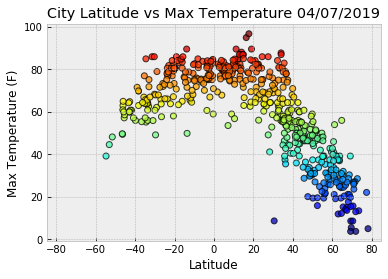

In [12]:
# scatter plot Lat vs Temp
plt.scatter(owm_cities_df["Latitude"], owm_cities_df["Temperature (F)"], c=owm_cities_df["Temperature (F)"], 
            marker='o', cmap='jet', linewidth=1, edgecolor='black', alpha=0.75)

# formatting
plt.style.use("bmh")
plt.title(f"City Latitude vs Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.xlim(-85, 85)

# save file
plt.savefig("WeatherPy_analysis/Lat_Temp.png")
# show plot
plt.show()

#### Latitude vs. Humidity Plot

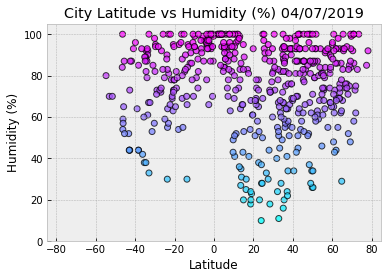

In [13]:
# scatter plot Lat vs Humidity
plt.scatter(owm_cities_df["Latitude"], owm_cities_df["Humidity (%)"], c=owm_cities_df["Humidity (%)"], 
            marker='o', cmap='cool', linewidth=1, edgecolor='black', alpha=0.75)

# formatting
plt.style.use("bmh")
plt.title(f"City Latitude vs Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.ylim(0,105)
plt.xlim(-85, 85)

# save file
plt.savefig("WeatherPy_analysis/Lat_Humid.png")
# show plot
plt.show()

#### Latitude vs. Cloudiness Plot

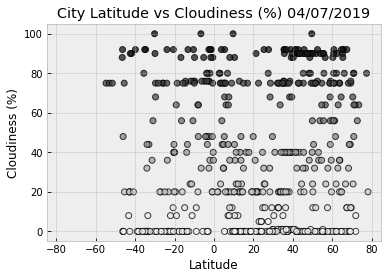

In [14]:
# scatter plot Lat vs CLoudiness
plt.scatter(owm_cities_df["Latitude"], owm_cities_df["Cloudiness (%)"], c=owm_cities_df["Cloudiness (%)"], 
            marker='o', cmap='binary', linewidth=1, edgecolor='black', alpha=0.75)

# formatting
plt.style.use("bmh")
plt.title(f"City Latitude vs Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.ylim(-5, 105)
plt.xlim(-85, 85)

# save file
plt.savefig("WeatherPy_analysis/Lat_Cloud.png")
# show plot
plt.show()

#### Latitude vs. Wind Speed Plot

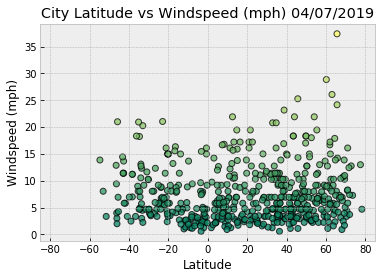

In [16]:
# scatter plot Lat vs Wind Speed
plt.scatter(owm_cities_df["Latitude"], owm_cities_df["Windspeed (mph)"], c=owm_cities_df["Windspeed (mph)"], 
            marker='o', cmap='summer', linewidth=1, edgecolor='black', alpha=0.75)

# formatting
plt.style.use("bmh")
plt.title(f"City Latitude vs Windspeed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(True)
# plt.ylim(-5, 105)
plt.xlim(-85, 85)

# save file
plt.savefig("WeatherPy_analysis/Lat_Wind.png")
# show plot
plt.show()